# $\;\;\;\;\;$SPAM CLASSIFIER NOTEBOOK


#### In his notebook i used following thing to make a spam classifier
#### 1. Exploratory data analysis
#### 2. Feature engineering 
#### 3. Data wrangling $\;\;\;\;\;\;\;\;\;\;$ 4. Predictive Modeling
#### 5. Model comparison $\;\;\;\;\;\;\;$ 6. Ensembling model
#### 7. Advanced modeling & hyper parameter tuning and optimization

### Importing basic modules

In [1]:
# Basic modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

### Importing Train and Test dataset

In [2]:
# Importing data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

### 1. Exploratory data analysis

In [3]:
train.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,1
2,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,1
3,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ﻿,1
4,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1


In [4]:
test.head()

,ID,COMMENT_ID,AUTHOR,DATE,CONTENT
0,0,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...
1,1,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com
2,2,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a..."
3,3,z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k,Bob Kanowski,2013-11-28T12:33:27,i turned it on mute as soon is i came on i jus...
4,4,z13ttt1jcraqexk2o234ghbgzxymz1zzi04,Cony,2013-11-28T16:01:47,You should check my channel for Funny VIDEOS!!﻿


In [5]:
train.describe(include=['object','integer'])

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
count,1157,1157,1019,1157,1157.000000
unique,1156,1094,1019,1057,NaN
top,LneaDw26bFvPh9xBHNw1btQoyP60ay_WWthtvXCx37s,Shadrach Grentz,2013-10-02T03:08:55.478000,Check out this video on YouTube:﻿,NaN
freq,2,5,1,52,NaN
mean,NaN,NaN,NaN,NaN,0.506482
std,NaN,NaN,NaN,NaN,0.500174
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,NaN,NaN,1.000000


In [6]:
test.describe(include=['object','integer'])

,ID,COMMENT_ID,AUTHOR,DATE,CONTENT
count,799.000000,799,799,692,799
unique,NaN,799,760,692,733
top,NaN,z12cjj2qyo34i3ga204ci3hatn3vhlcoxkw0k,AllDailyVines,2015-05-25T19:56:09.670000,Check out this video on YouTube:﻿
freq,NaN,1,3,1,45
mean,399.000000,NaN,NaN,NaN,NaN
std,230.795725,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN
25%,199.500000,NaN,NaN,NaN,NaN
50%,399.000000,NaN,NaN,NaN,NaN
75%,598.500000,NaN,NaN,NaN,NaN


Text(0.5,1,'Missing Values')

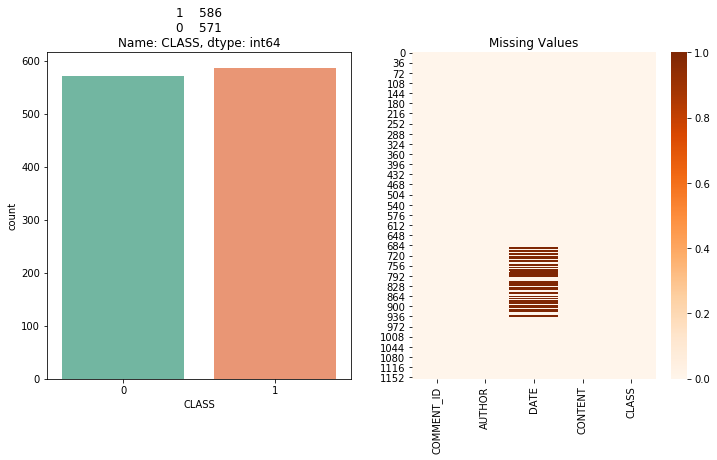

In [7]:
fig,ax= plt.subplots(1,2,figsize=(12,6))
sns.countplot(train.CLASS, palette='Set2', ax=ax[0])
ax[0].set_title(train.CLASS.value_counts())
sns.heatmap(train.isnull(),cmap='Oranges',ax=ax[1])
ax[1].set_title('Missing Values')

Text(0.5,1,'Missing Values')

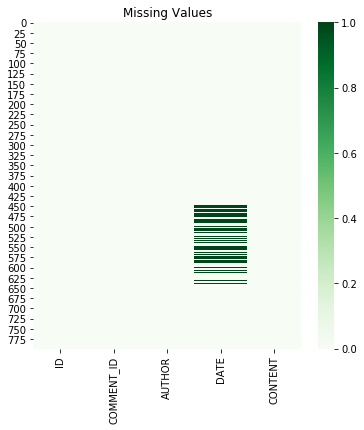

In [8]:
fig= plt.figure(figsize=(6,6))
sns.heatmap(test.isnull(),cmap='Greens')
plt.title('Missing Values')

#### a) Both train and test dataset contains missing values

#### b) Class is balanced

#### c) Trainset contain one duplicate value

### 2. Feature Engineering with EDA

<img src='1.png'> 
#### Insight :
    1. Multiple times comment -> Spam

<img src='2.png'>

In [9]:
# Feature engineering
# create column to check whether AUTHOR commented once or more than once -> MULTI_COMMENT : 1-> Yes , 0 -> No
def extract_multi_comments(data):
    data['MULTI_COMMENT'] = data['AUTHOR'] #to initialise multi_comments
    z=0
    for i in range(len(data)):
        for j in range(1,len(data)):
            if(data.iloc[i,1] == data.iloc[j,1]):
                z=z+1
        if(z>1):
            data.ix[i,'MULTI_COMMENT']=1
        else:
            data.ix[i,'MULTI_COMMENT']=0
        z=0
    return data

<img src = '3.png' >

#### Insight:
    1. Month as granularity

In [10]:
# feature engineering
# function to create several columns based on year/month of author commented
def datetime(data):
    data=data.set_index('DATE')
    data.index=pd.to_datetime(data.index)
    data['year_2013']=data.index.year==2013
    data['year_2014']=data.index.year==2014
    data['year_2015']=data.index.year==2015
    data['mon_1']=data.index.month==1
    data['mon_2']=data.index.month==2
    data['mon_3']=data.index.month==3
    data['mon_4']=data.index.month==4
    data['mon_5']=data.index.month==5
    data['mon_6']=data.index.month==6
    data['mon_7']=data.index.month==7
    data['mon_8']=data.index.month==8
    data['mon_9']=data.index.month==9
    data['mon_10']=data.index.month==10
    data['mon_11']=data.index.month==11
    data['mon_12']=data.index.month==12
    return(data)

In [11]:
train.CONTENT.tail(20)

1137             Love itt and ppl check out my channel!!!
1138                                 SUBSCRIBE MY CHANNEL
1139                                       adf.ly / KlD3Y
1140                               check out my new video
1141    ******* Facebook is LAME and so 2004! Check ou...
1142    Please check out and send to others Freedom an...
1143    Nice to meet You - this is Johnny: 1. If You a...
1144     hey you ! check out the channel of Alvar Lake !!
1145                                                  wow
1146                                Love this song !!!!!!
1147    Check out this video on YouTube:<br />&quot;Th...
1148    O peoples of the earth, I have seen how you pe...
1149    I WILL NEVER FORGET THIS SONG IN MY LIFE LIKE ...
1150    **CHECK OUT MY NEW MIXTAPE**** **CHECK OUT MY ...
1151    **CHECK OUT MY NEW MIXTAPE**** **CHECK OUT MY ...
1152    **CHECK OUT MY NEW MIXTAPE**** **CHECK OUT MY ...
1153                                  Waka waka she rules
1154    I love

In [12]:
words=re.compile(r'check out|.com/|check them|christ|check me|card|search|dear|check my|\
                buck|gift|check it|check this|dollar|[=+]|sub|channel|adf|instagram|share|\
                follow|http|https://|[$]|please|money|free|www|facebook|fb|support|\
                like this comment',re.IGNORECASE)
train[train.CONTENT.str.contains(words)].CLASS.value_counts()

1    554
0     21
Name: CLASS, dtype: int64

<img src = '4.png'>

    1 ->  586 & 0 ->  571

    1 ->  554 & 0 ->  21


In [13]:
# feature engineering
# create column to check whether CONTENT column in contain any Spam words -> spam_word column :True -> Yes, False-> No
def extract_spam_words(data):
    words=re.compile(r'check out|.com/|check them|christ|check me|card|search|dear\
                     |check my|buck|gift|check it|check this|dollar|[=+]|sub|channel\
                     |adf|instagram|share|follow|http|https://|[$]|please|money|free\
                     |www|facebook|fb|support|like this comment',re.IGNORECASE)
    data['spam_word']=data.CONTENT.str.contains(words)
    return data

### What if we combine spam_word and multi_comment ?

In [14]:
# feature engineering
# create column to show if user commented multiple times using spam words: spam_multi_comment: 1->yes, 0->no
def extract_spam_multi_comments(data):
    data['spam_multi_comment'] = data['spam_word'] + data['MULTI_COMMENT']
    data['spam_multi_comment'] = data.spam_multi_comment.replace({2:1,1:0})
    return data

### 3. Data Wrangling

In [15]:
# function to clean dataset
def cleaner(data):
    del data['CONTENT']
    del data['COMMENT_ID']
    del data['AUTHOR']
    x=data.columns
    for i in range(0,17):
        data[x[i]]=np.where(data[x[i]]==True,1,0)
    return data

### Applying above defined function 

In [16]:
# Feature engineering function 1
trainset=extract_spam_words(train)
testset=extract_spam_words(test)
trainset.tail()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,spam_word
1152,_2viQ_Qnc6_RKHVetk9kLzx8ZC62_J7y73FWFSBTe8Q,ThirdDegr3e,2013-07-13T20:47:40.793000,**CHECK OUT MY NEW MIXTAPE**** **CHECK OUT MY ...,1,True
1153,_2viQ_Qnc68TufyXKiTwky80ewSPbhRiD5XFHrJH9lg,Ysobel Schofield,2013-07-13T20:17:25.181000,Waka waka she rules,0,False
1154,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0,False
1155,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0,False
1156,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0,False


In [17]:
testset.head()

,ID,COMMENT_ID,AUTHOR,DATE,CONTENT,spam_word
0,0,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,True
1,1,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,False
2,2,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a...",True
3,3,z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k,Bob Kanowski,2013-11-28T12:33:27,i turned it on mute as soon is i came on i jus...,False
4,4,z13ttt1jcraqexk2o234ghbgzxymz1zzi04,Cony,2013-11-28T16:01:47,You should check my channel for Funny VIDEOS!!﻿,True


In [18]:
# Feature engineering function 2
trainset=extract_multi_comments(trainset)
testset=extract_multi_comments(testset)
trainset.tail()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,spam_word,MULTI_COMMENT
1152,_2viQ_Qnc6_RKHVetk9kLzx8ZC62_J7y73FWFSBTe8Q,ThirdDegr3e,2013-07-13T20:47:40.793000,**CHECK OUT MY NEW MIXTAPE**** **CHECK OUT MY ...,1,True,1
1153,_2viQ_Qnc68TufyXKiTwky80ewSPbhRiD5XFHrJH9lg,Ysobel Schofield,2013-07-13T20:17:25.181000,Waka waka she rules,0,False,0
1154,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,0,False,0
1155,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,2013-07-13T12:09:31.188000,wow,0,False,0
1156,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,0,False,0


In [19]:
testset.head()

,ID,COMMENT_ID,AUTHOR,DATE,CONTENT,spam_word,MULTI_COMMENT
0,0,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,True,0
1,1,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,False,0
2,2,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a...",True,0
3,3,z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k,Bob Kanowski,2013-11-28T12:33:27,i turned it on mute as soon is i came on i jus...,False,0
4,4,z13ttt1jcraqexk2o234ghbgzxymz1zzi04,Cony,2013-11-28T16:01:47,You should check my channel for Funny VIDEOS!!﻿,True,0


#### Handling Missing Data before datetime feature extraction

<img src = '3.png' >

In [20]:
# Handling missing values for trainset and testset
trainset.dropna(inplace=True)
testset.fillna(0,inplace=True)

In [21]:
# Removing trainset duplicated values
trainset[trainset.duplicated() == True]

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS,spam_word,MULTI_COMMENT


In [22]:
# Handling Datetime 
trainset=datetime(trainset)
trainset_label=trainset['CLASS']
del trainset['CLASS']
testset=datetime(testset)
trainset.tail(4)

,COMMENT_ID,AUTHOR,CONTENT,spam_word,MULTI_COMMENT,year_2013,year_2014,year_2015,mon_1,mon_2,mon_3,mon_4,mon_5,mon_6,mon_7,mon_8,mon_9,mon_10,mon_11,mon_12
DATE,,,,,,,,,,,,,,,,,,,,
2013-07-13 20:17:25.181,_2viQ_Qnc68TufyXKiTwky80ewSPbhRiD5XFHrJH9lg,Ysobel Schofield,Waka waka she rules,False,0,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2013-07-13 13:14:30.021,_2viQ_Qnc6-pY-1yR6K2FhmC5i48-WuNx5CumlHLDAI,Sabina Pearson-Smith,I love this song for two reasons: 1.it is abou...,False,0,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2013-07-13 12:09:31.188,_2viQ_Qnc6_k_n_Bse9zVhJP8tJReZpo8uM2uZfnzDs,jeffrey jules,wow,False,0,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2013-07-13 11:17:52.308,_2viQ_Qnc6_yBt8UGMWyg3vh0PulTqcqyQtdE7d4Fl0,Aishlin Maciel,Shakira u are so wiredo,False,0,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [23]:
testset.head(4)

,ID,COMMENT_ID,AUTHOR,CONTENT,spam_word,MULTI_COMMENT,year_2013,year_2014,year_2015,mon_1,...,mon_3,mon_4,mon_5,mon_6,mon_7,mon_8,mon_9,mon_10,mon_11,mon_12
DATE,,,,,,,,,,,,,,,,,,,,,
2013-11-07 12:37:15,0,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,Hey guys check out my new channel and our firs...,True,0,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2013-11-08 17:34:21,1,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,just for test I have to say murdev.com,False,0,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2013-11-26 02:55:11,2,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,"Hey, check out my new website!! This site is a...",True,0,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2013-11-28 12:33:27,3,z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k,Bob Kanowski,i turned it on mute as soon is i came on i jus...,False,0,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [24]:
# Cleaning Dataset
trainset=cleaner(trainset)
del testset['ID']
testset= cleaner(testset)
trainset.head(4)

,spam_word,MULTI_COMMENT,year_2013,year_2014,year_2015,mon_1,mon_2,mon_3,mon_4,mon_5,mon_6,mon_7,mon_8,mon_9,mon_10,mon_11,mon_12
DATE,,,,,,,,,,,,,,,,,
2013-11-07 06:20:48,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2013-11-09 08:28:43,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2013-11-10 16:05:38,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2013-11-27 21:39:24,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [25]:
testset.head(4)

,spam_word,MULTI_COMMENT,year_2013,year_2014,year_2015,mon_1,mon_2,mon_3,mon_4,mon_5,mon_6,mon_7,mon_8,mon_9,mon_10,mon_11,mon_12
DATE,,,,,,,,,,,,,,,,,
2013-11-07 12:37:15,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2013-11-08 17:34:21,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2013-11-26 02:55:11,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2013-11-28 12:33:27,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [26]:
# Feature engineering (spam_word + Multi comments)
trainset=extract_spam_multi_comments(trainset)
testset=extract_spam_multi_comments(testset)
trainset.head(4)

,spam_word,MULTI_COMMENT,year_2013,year_2014,year_2015,mon_1,mon_2,mon_3,mon_4,mon_5,mon_6,mon_7,mon_8,mon_9,mon_10,mon_11,mon_12,spam_multi_comment
DATE,,,,,,,,,,,,,,,,,,
2013-11-07 06:20:48,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2013-11-09 08:28:43,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2013-11-10 16:05:38,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2013-11-27 21:39:24,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [27]:
testset.head(4)

,spam_word,MULTI_COMMENT,year_2013,year_2014,year_2015,mon_1,mon_2,mon_3,mon_4,mon_5,mon_6,mon_7,mon_8,mon_9,mon_10,mon_11,mon_12,spam_multi_comment
DATE,,,,,,,,,,,,,,,,,,
2013-11-07 12:37:15,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2013-11-08 17:34:21,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2013-11-26 02:55:11,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2013-11-28 12:33:27,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [28]:
trainset.shape, testset.shape

((1019, 18), (799, 18))

In [29]:
trainset.columns, testset.columns

(Index(['spam_word', 'MULTI_COMMENT', 'year_2013', 'year_2014', 'year_2015',
        'mon_1', 'mon_2', 'mon_3', 'mon_4', 'mon_5', 'mon_6', 'mon_7', 'mon_8',
        'mon_9', 'mon_10', 'mon_11', 'mon_12', 'spam_multi_comment'],
       dtype='object'),
 Index(['spam_word', 'MULTI_COMMENT', 'year_2013', 'year_2014', 'year_2015',
        'mon_1', 'mon_2', 'mon_3', 'mon_4', 'mon_5', 'mon_6', 'mon_7', 'mon_8',
        'mon_9', 'mon_10', 'mon_11', 'mon_12', 'spam_multi_comment'],
       dtype='object'))

### 4. Predictive Modeling

### Splittting data into test and train set

In [30]:
# to split dataset for training and validation purpose
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(trainset, trainset_label, test_size=0.30,
                                             stratify=trainset_label,random_state=87337)

#### Importing Classifiers

In [31]:
# Classifiers
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb

#### Evaluation metrics

In [32]:
# Evaluation metrics to evaluate classifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

### Cross-Validation 

In [33]:
def CrossVal(dataX,dataY,mode,cv=10):
    score=cross_val_score(mode,dataX , dataY, cv=cv, scoring='accuracy')
    return(np.mean(score))

### Helper function to plot ROC curve, Precision Recall curve, Confusion matrix

In [34]:
def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    precision,recall,threshold = precision_recall_curve(true,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Average Precision Score : {}".format(average_precision_score(true,pred[:,1])))
    fpr,tpr,threshold = roc_curve(true,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    return auc(fpr,tpr)

### a) Stochastic Gradient Descent

Accuracy is :  0.955144757433


Text(0.5,1,'F1 Score = 0.9527272727272726')

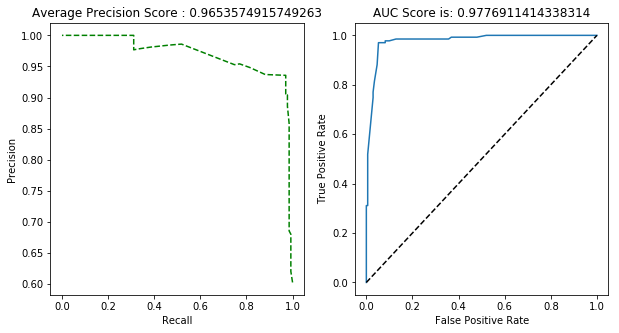

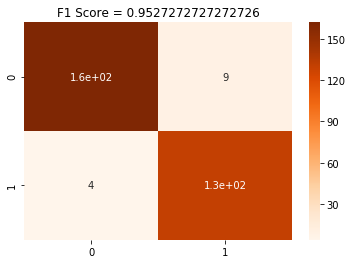

In [35]:
sgd=SGDClassifier(tol=1e-25, random_state=1343234,loss='log', class_weight = 'balanced')
score_sgd=CrossVal(Xtrain,Ytrain,sgd)
print("Accuracy is : ",score_sgd)
sgd.fit(Xtrain,Ytrain)
sgd_auc=plotting(Ytest,sgd.predict_proba(Xtest))
fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,sgd.predict(Xtest)), annot= True, cmap='Oranges')
sgd_f1=f1_score(Ytest,sgd.predict(Xtest))
plt.title('F1 Score = {}'.format(sgd_f1))

### b) K-Nearest Neighbors

Accuracy is :  0.949550078247


Text(0.5,1,'F1 Score = 0.9323843416370107')

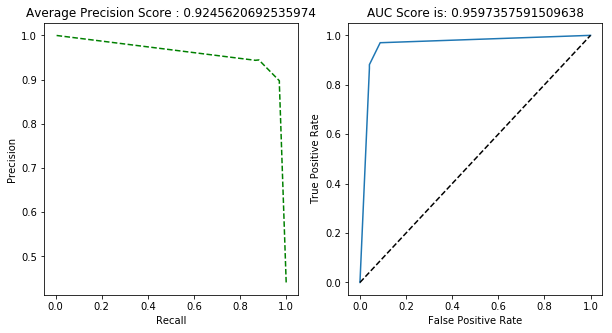

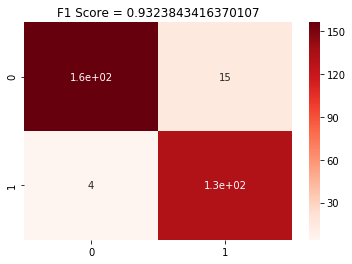

In [36]:
k=KNeighborsClassifier(algorithm='auto', n_neighbors= 5)
score_k=CrossVal(Xtrain,Ytrain,k)
print("Accuracy is : ",score_k)
k.fit(Xtrain,Ytrain)
k_auc=plotting(Ytest,k.predict_proba(Xtest))


fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,k.predict(Xtest)), annot= True, cmap='Reds')
k_f1=f1_score(Ytest,k.predict(Xtest))
plt.title('F1 Score = {}'.format(k_f1))

### c)Logistic

Accuracy is :  0.956533646322


Text(0.5,1,'F1 Score = 0.9527272727272726')

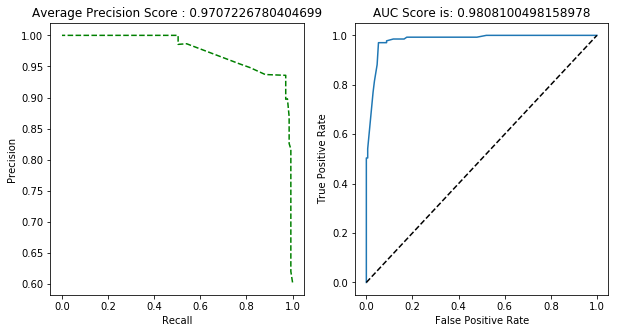

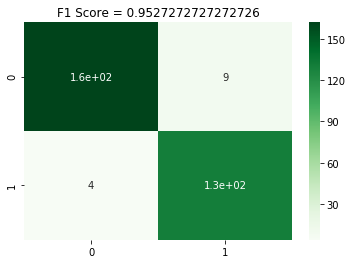

In [37]:
lr=LogisticRegression(class_weight='balanced', tol=1e-25)
score_lr=CrossVal(Xtrain,Ytrain,lr)
print("Accuracy is : ",score_lr)
lr.fit(Xtrain,Ytrain)
lr_auc =plotting(Ytest,lr.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,lr.predict(Xtest)), annot= True, cmap='Greens')
lr_f1=f1_score(Ytest,lr.predict(Xtest))
plt.title('F1 Score = {}'.format(lr_f1))

### d) decision tree

Accuracy is :  0.955125195618


Text(0.5,1,'F1 Score = 0.9527272727272726')

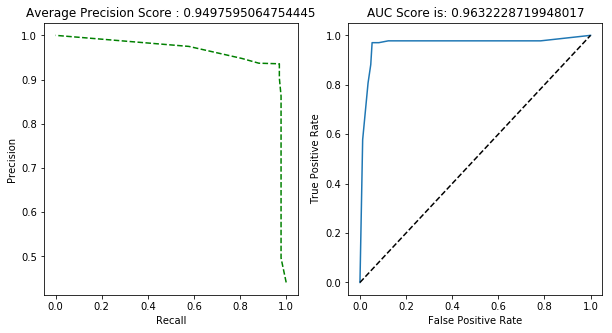

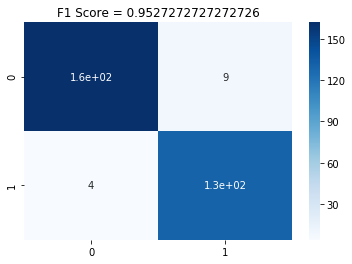

In [38]:
dtc=DecisionTreeClassifier()
score_dtc=CrossVal(Xtrain,Ytrain,dtc)
print("Accuracy is : ",score_dtc)
dtc.fit(Xtrain,Ytrain)
dtc_auc =plotting(Ytest,dtc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,dtc.predict(Xtest)), annot= True, cmap='Blues')
dtc_f1=f1_score(Ytest,dtc.predict(Xtest))
plt.title('F1 Score = {}'.format(dtc_f1))

### e) Support vector machine

Accuracy is :  0.955125195618


Text(0.5,1,'F1 Score = 0.9527272727272726')

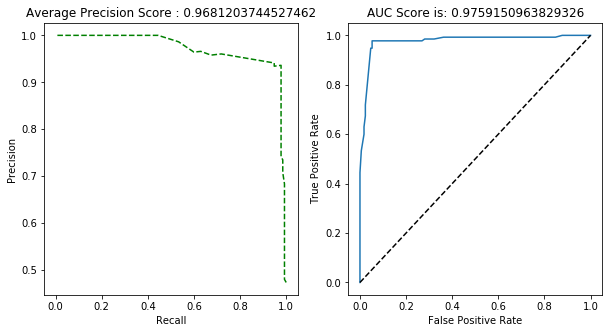

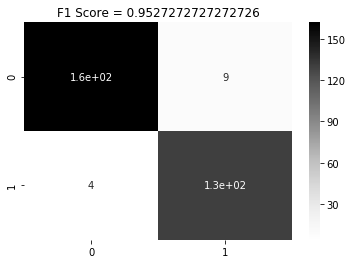

In [39]:
svc=SVC(class_weight='balanced',C=20,probability=True,kernel='rbf',gamma=0.1)
score_svc=CrossVal(Xtrain,Ytrain,svc)
print("Accuracy is : ",score_svc)
svc.fit(Xtrain,Ytrain)
svc_auc =plotting(Ytest,svc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,svc.predict(Xtest)), annot= True, cmap='Greys')
svc_f1=f1_score(Ytest,svc.predict(Xtest))
plt.title('F1 Score = {}'.format(svc_f1))

### f) Random Forest Classifier

Accuracy is: 0.953736306729


Text(0.5,1,'F1 Score = 0.9527272727272726')

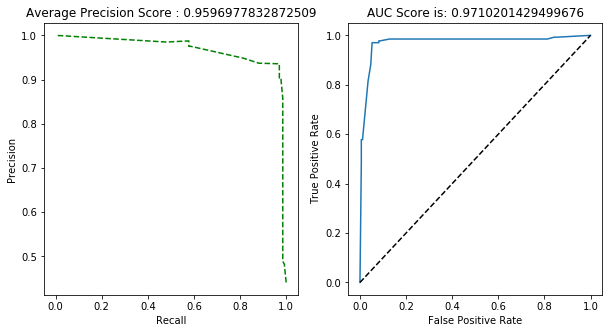

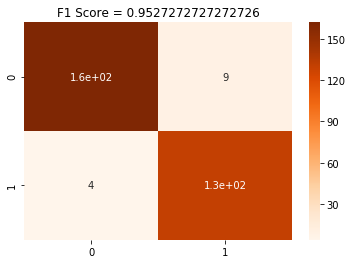

In [40]:
rf=RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=98723, class_weight='balanced')
score_rf= CrossVal(Xtrain,Ytrain,rf)
print('Accuracy is:',score_rf)
rf.fit(Xtrain,Ytrain)
rf_auc =plotting(Ytest,rf.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,rf.predict(Xtest)), annot= True, cmap='Oranges')

rf_f1=f1_score(Ytest,rf.predict(Xtest))
plt.title('F1 Score = {}'.format(rf_f1))

### g) Extra Trees Classifier

Accuracy is: 0.952327856025


Text(0.5,1,'F1 Score = 0.9527272727272726')

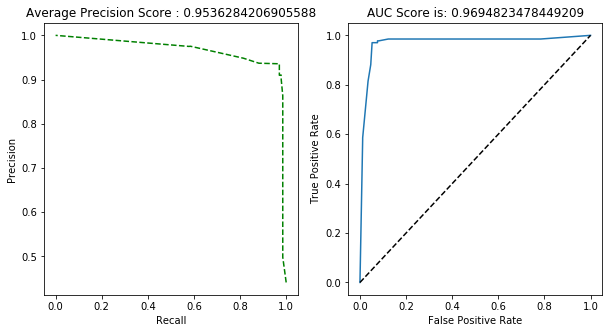

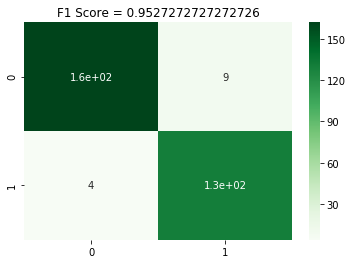

In [41]:
etc=ExtraTreesClassifier(n_estimators=1000, n_jobs=-1, random_state=243234, class_weight = 'balanced')
score_etc= CrossVal(Xtrain,Ytrain,etc)
print('Accuracy is:',score_etc)
etc.fit(Xtrain,Ytrain)
etc_auc=plotting(Ytest,etc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,etc.predict(Xtest)), annot= True, cmap='Greens')

etc_f1=f1_score(Ytest,etc.predict(Xtest))
plt.title('F1 Score = {}'.format(etc_f1))

### h) Ada Boost Classifier

Accuracy is: 0.956533646322


Text(0.5,1,'F1 Score = 0.9527272727272726')

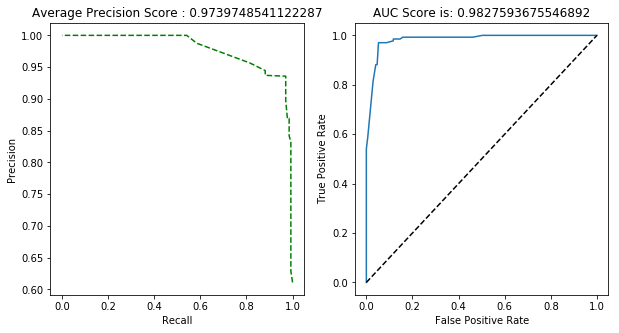

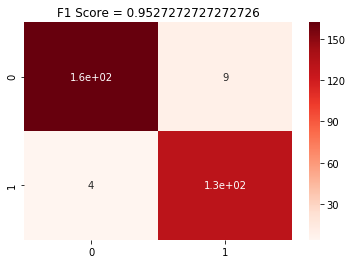

In [42]:
abc=AdaBoostClassifier(sgd ,n_estimators=500, random_state=98734,algorithm='SAMME.R', learning_rate=0.001)
score_ada= CrossVal(Xtrain,Ytrain,abc)
print('Accuracy is:',score_ada)
abc.fit(Xtrain,Ytrain)
abc_auc=plotting(Ytest,abc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,abc.predict(Xtest)), annot= True, cmap='Reds')

abc_f1=f1_score(Ytest,abc.predict(Xtest))
plt.title('F1 Score = {}'.format(abc_f1))

### i) Gradient Boosting Classifier 

Accuracy is: 0.956533646322


Text(0.5,1,'F1 Score = 0.9527272727272726')

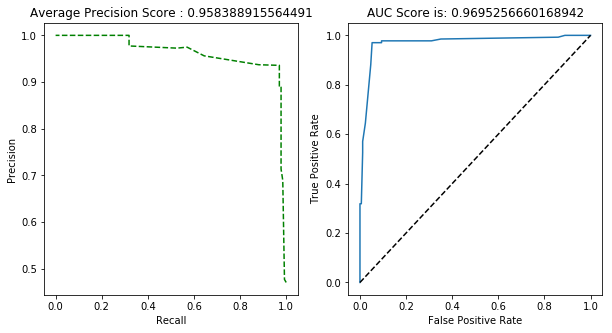

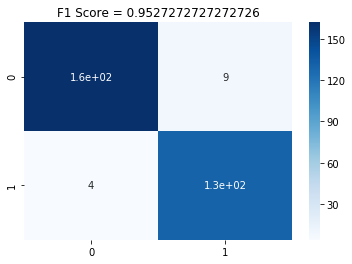

In [43]:
gbc=GradientBoostingClassifier(n_estimators=500, random_state=293847, learning_rate = 0.005)
score_gbc= CrossVal(Xtrain,Ytrain,gbc)
print('Accuracy is:',score_gbc)
gbc.fit(Xtrain,Ytrain)
gbc_auc =plotting(Ytest,gbc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,gbc.predict(Xtest)), annot= True, cmap='Blues')

gbc_f1=f1_score(Ytest,gbc.predict(Xtest))
plt.title('F1 Score = {}'.format(gbc_f1))

### j) Bagging Classifier 

Accuracy is: 0.956533646322


Text(0.5,1,'F1 Score = 0.9527272727272726')

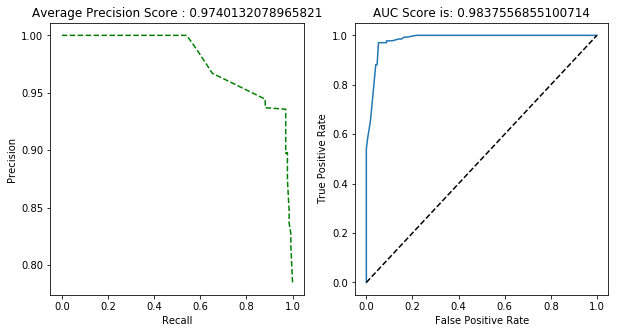

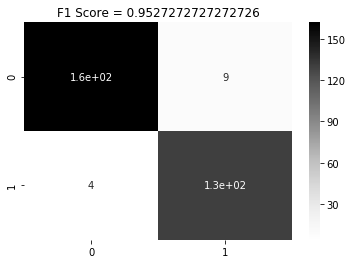

In [44]:
bc=BaggingClassifier(lr,max_samples=31, bootstrap=True, n_jobs= -1)
score_bc= CrossVal(Xtrain,Ytrain,gbc)
print('Accuracy is:',score_bc)
bc.fit(Xtrain,Ytrain)
bc_auc =plotting(Ytest,bc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,bc.predict(Xtest)), annot= True, cmap='Greys')

bc_f1=f1_score(Ytest,bc.predict(Xtest))
plt.title('F1 Score = {}'.format(bc_f1))

### 5) Model Comparison

#### F1 score

Text(0.5,1,'Model F1 Score Comparison')

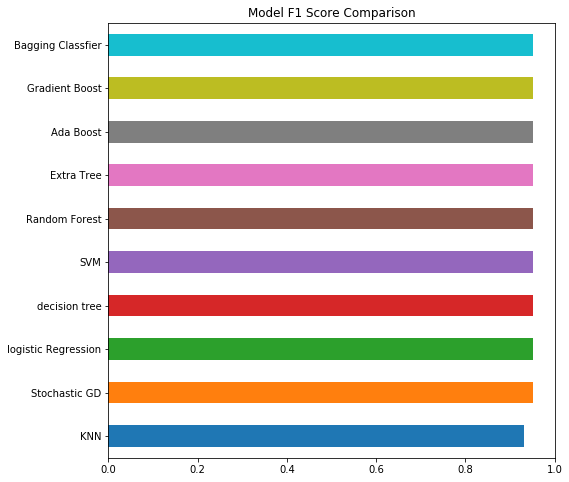

In [45]:
model_f1_score = pd.Series(data=[sgd_f1, k_f1, lr_f1, dtc_f1, svc_f1, rf_f1, etc_f1, 
                           abc_f1, gbc_f1, bc_f1], 
                           index=['Stochastic GD','KNN','logistic Regression','decision tree', 'SVM', 'Random Forest',
                                'Extra Tree', 'Ada Boost' , 'Gradient Boost', 'Bagging Classfier'])
fig= plt.figure(figsize=(8,8))
model_f1_score.sort_values().plot.barh()
plt.title('Model F1 Score Comparison')

#### AUC score

Text(0.5,1,'Model AUC Score Comparison')

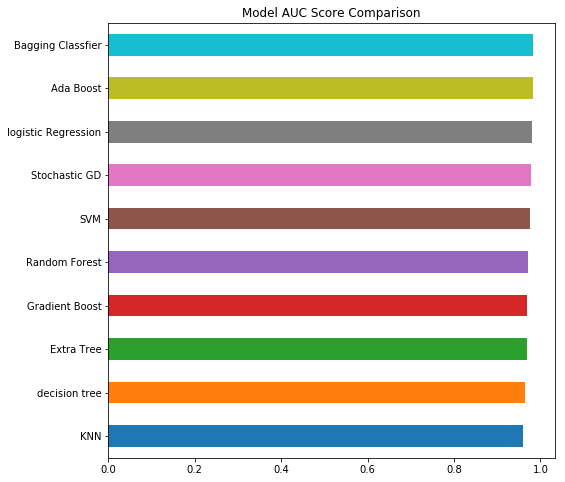

In [46]:
model_auc_score = pd.Series(data=[sgd_auc, k_auc, lr_auc, dtc_auc, svc_auc, rf_auc, etc_auc, 
                           abc_auc, gbc_auc, bc_auc], 
                           index=['Stochastic GD','KNN','logistic Regression','decision tree', 'SVM', 'Random Forest',
                                'Extra Tree', 'Ada Boost' , 'Gradient Boost', 'Bagging Classfier'])
fig= plt.figure(figsize=(8,8))
model_auc_score.sort_values().plot.barh()
plt.title('Model AUC Score Comparison')

### Based on F1 score and AUC score :
#### Stochastic Gradient Descent
#### Logistic Regression Classifier
#### Bagging Classifier
#### Ada Boost Classifier

### 6. Ensembling best classifiers

### k) Voting Classifier

Accuracy is: 0.956533646322


Text(0.5,1,'F1 Score = 0.9527272727272726')

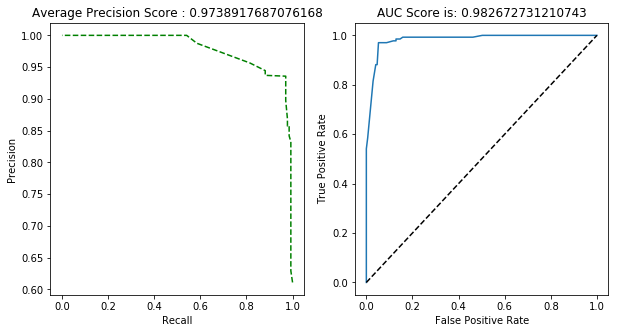

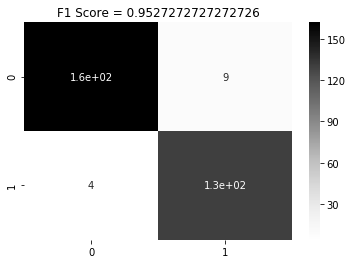

In [47]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(voting='soft', estimators=[('bg',bc),('abc',abc),('lr',lr)])
score_vc= CrossVal(Xtrain,Ytrain,vc)
print('Accuracy is:',score_vc)
vc.fit(Xtrain,Ytrain)
plotting(Ytest,vc.predict_proba(Xtest))

fig=plt.figure()
sns.heatmap(confusion_matrix(Ytest,vc.predict(Xtest)), annot= True, cmap='Greys')

vc_f1=f1_score(Ytest,vc.predict(Xtest))
plt.title('F1 Score = {}'.format(vc_f1))

#### Feature importance

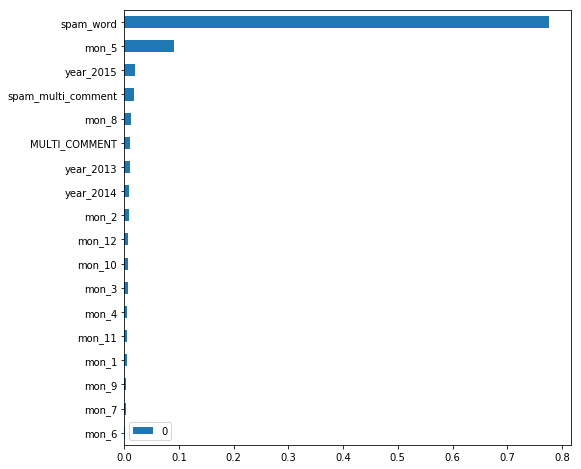

In [48]:
pd.DataFrame(rf.feature_importances_,index=Xtrain.columns).sort_values(by=0).plot.barh(figsize=(8,8))

### What if we use Algorithm which can do Bagging and Boosting both  ?

### Light gradient boosting 

### 6) Advanced model & Hyper Parameter Tuning


In [49]:
'''from bayes_opt import BayesianOptimization 

def hyperparametertuning(Xtrain, Ytrain,init_round=20, opt_round=10, learning_rate=0.01, n_estimators=1000,n_folds=10):<br/>
    lgb_train=lgb.Dataset(trainset, trainset_label)<br/>
    
    def tuning(max_depth, num_leaves, lambda_l1, lambda_l2, feature_fraction,colsample_bytree,subsample,bagging_fraction, min_data_in_leaf, min_gain_to_split):
        params = {'objective':'binary', 'metric':'auc' ,'num_boosting_round' : n_estimators ,
                'learning_rate' : learning_rate}
        params['num_leaves'] = round(int(num_leaves))
        params['max_depth'] = round(int(max_depth))
        params['feature_fraction'] = max(min(feature_fraction,0),1)
        params['bagging_fraction'] = max(min(bagging_fraction,0),1)
        params['colsample_bytree'] = max(min(colsample_bytree,0),1)
        params['subsample'] = max(min(subsample,0),1)
        params['min_data_in_leaf'] = round(int(min_data_in_leaf))
        params['min_gain_to_split'] = min_gain_to_split
        params['lambda_l1'] = lambda_l1
        params['lambda_l2'] = lambda_l2
        lgb_cv = lgb.cv(params, lgb_train, metrics = ['auc'])
        return max(lgb_cv['auc-mean'])
    
    optimize = BayesianOptimization(tuning,{'num_leaves':(20,60), 'max_depth':(3,9), 'feature_fraction':(0,1),
                                           'bagging_fraction':(0,1), 'min_data_in_leaf':(5,100),'subsample':(0,1),
                                            'min_gain_to_split':(0.0001,0.9), 'lambda_l1': (0,2),'lambda_l2':(0,2),
                                           'colsample_bytree':(0,1)})
    optimize.maximize(init_round, opt_round)
    return optimize'''                        

"from bayes_opt import BayesianOptimization \n\ndef hyperparametertuning(Xtrain, Ytrain,init_round=20, opt_round=10, learning_rate=0.01, n_estimators=1000,n_folds=10):<br/>\n    lgb_train=lgb.Dataset(trainset, trainset_label)<br/>\n    \n    def tuning(max_depth, num_leaves, lambda_l1, lambda_l2, feature_fraction,colsample_bytree,subsample,bagging_fraction, min_data_in_leaf, min_gain_to_split):\n        params = {'objective':'binary', 'metric':'auc' ,'num_boosting_round' : n_estimators ,\n                'learning_rate' : learning_rate}\n        params['num_leaves'] = round(int(num_leaves))\n        params['max_depth'] = round(int(max_depth))\n        params['feature_fraction'] = max(min(feature_fraction,0),1)\n        params['bagging_fraction'] = max(min(bagging_fraction,0),1)\n        params['colsample_bytree'] = max(min(colsample_bytree,0),1)\n        params['subsample'] = max(min(subsample,0),1)\n        params['min_data_in_leaf'] = round(int(min_data_in_leaf))\n        params['min

In [50]:
param = {
  'bagging_fraction': 0.6132942194801654,
  'colsample_bytree': 0.3787126672691248,
  'feature_fraction': 0.9952813805616908,
  'lambda_l1': 0.14013984921443146,
  'lambda_l2': 0.17966112145500235,
  'max_depth': 8,
  'min_data_in_leaf': 9,
  'min_gain_to_split': 0.013724581067876487,
  'num_leaves': 21,
  'subsample': 0.03366508401866353,
  'metric':'auc',
  'objective':'binary',
  'booster':'gbdt'}

In [51]:
# tuning number of estimators
data_1=lgb.Dataset(Xtrain,Ytrain)
data_2=lgb.Dataset(Xtest,Ytest,reference=data_1)
best=lgb.train(param, train_set=data_1, valid_sets=data_2, num_boost_round=20000, early_stopping_rounds=700)

[1]	valid_0's auc: 0.964587
Training until validation scores don't improve for 700 rounds.
[2]	valid_0's auc: 0.964587
[3]	valid_0's auc: 0.964587
[4]	valid_0's auc: 0.964587
[5]	valid_0's auc: 0.964587
[6]	valid_0's auc: 0.969136
[7]	valid_0's auc: 0.969136
[8]	valid_0's auc: 0.969136
[9]	valid_0's auc: 0.969136
[10]	valid_0's auc: 0.969136
[11]	valid_0's auc: 0.969136
[12]	valid_0's auc: 0.969136
[13]	valid_0's auc: 0.97271
[14]	valid_0's auc: 0.973706
[15]	valid_0's auc: 0.979554
[16]	valid_0's auc: 0.980377
[17]	valid_0's auc: 0.979662
[18]	valid_0's auc: 0.980615
[19]	valid_0's auc: 0.980269
[20]	valid_0's auc: 0.980312
[21]	valid_0's auc: 0.980312
[22]	valid_0's auc: 0.980312
[23]	valid_0's auc: 0.980312
[24]	valid_0's auc: 0.980312
[25]	valid_0's auc: 0.980312
[26]	valid_0's auc: 0.980312
[27]	valid_0's auc: 0.980312
[28]	valid_0's auc: 0.980312
[29]	valid_0's auc: 0.980312
[30]	valid_0's auc: 0.98016
[31]	valid_0's auc: 0.98003
[32]	valid_0's auc: 0.9799
[33]	valid_0's auc: 0.9

[434]	valid_0's auc: 0.974269
[435]	valid_0's auc: 0.974269
[436]	valid_0's auc: 0.974269
[437]	valid_0's auc: 0.974269
[438]	valid_0's auc: 0.974269
[439]	valid_0's auc: 0.974269
[440]	valid_0's auc: 0.974269
[441]	valid_0's auc: 0.974269
[442]	valid_0's auc: 0.974269
[443]	valid_0's auc: 0.974269
[444]	valid_0's auc: 0.974269
[445]	valid_0's auc: 0.974269
[446]	valid_0's auc: 0.974269
[447]	valid_0's auc: 0.974269
[448]	valid_0's auc: 0.974269
[449]	valid_0's auc: 0.974269
[450]	valid_0's auc: 0.974269
[451]	valid_0's auc: 0.974269
[452]	valid_0's auc: 0.974269
[453]	valid_0's auc: 0.974269
[454]	valid_0's auc: 0.974269
[455]	valid_0's auc: 0.974269
[456]	valid_0's auc: 0.974269
[457]	valid_0's auc: 0.974269
[458]	valid_0's auc: 0.974269
[459]	valid_0's auc: 0.974269
[460]	valid_0's auc: 0.974269
[461]	valid_0's auc: 0.974269
[462]	valid_0's auc: 0.974269
[463]	valid_0's auc: 0.974269
[464]	valid_0's auc: 0.974269
[465]	valid_0's auc: 0.974269
[466]	valid_0's auc: 0.974269
[467]	vali

In [52]:
best.best_score, best.best_iteration

(defaultdict(dict, {'valid_0': {'auc': 0.98061511804201862}}), 18)

#### Since from all models LGB doing better and achieved auc score of 0.98832. So we will use it to built our model

In [53]:
lgbm = lgb.LGBMClassifier(n_estimators=best.best_iteration,learning_rate=0.01,
                          bagging_fraction=0.6132942194801654,colsample_bytree = 0.3787126672691248,
                          feature_fraction= 0.9952813805616908,lambda_l1= 0.14013984921443146,
                          lambda_l2= 0.17966112145500235,max_depth= 8,min_data_in_leaf= 9,
                          min_gain_to_split= 0.013724581067876487,num_leaves= 21,subsample= 0.03366508401866353,
                          metric= 'auc',objective='binary',booster= 'gbdt')

In [54]:
lgbm.fit(trainset,trainset_label)

LGBMClassifier(bagging_fraction=0.6132942194801654, booster='gbdt',
        boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.3787126672691248,
        feature_fraction=0.9952813805616908, importance_type='split',
        lambda_l1=0.14013984921443146, lambda_l2=0.17966112145500235,
        learning_rate=0.01, max_depth=8, metric='auc',
        min_child_samples=20, min_child_weight=0.001, min_data_in_leaf=9,
        min_gain_to_split=0.013724581067876487, min_split_gain=0.0,
        n_estimators=18, n_jobs=-1, num_leaves=21, objective='binary',
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=0.03366508401866353, subsample_for_bin=200000,
        subsample_freq=0)

In [55]:
prediction=lgbm.predict(testset)
output=pd.DataFrame({'ID':range(0,799), 'CLASS':prediction})
output.to_csv('spam_classifed_rishi_presentation.csv',index=False)

## THANKS